In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.stats as sps
import scipy.optimize

Posterior

$$P(\rho|X) = \frac{P(X|\rho) P(\rho)}{P(X)}$$

$$X_i \sim \text{Bernoulli}(\rho)$$

$$\rho \sim \text{Beta}(a, b)$$

$$\log P(\rho|X)$$

In [2]:
X = [1, 1, 1, 1, 1, 0, 1, 1, 0]
rho = np.linspace(0, 1, 101)

In [23]:
def log_posterior(rho:float, X:list, a=2, b=2):
    """Evaluate log-posterior from data and parameters"""

    if rho < 0 or rho > 1:
        return np.inf

    log_x_rho = sps.bernoulli(rho).logpmf(X) # x is discrete; this is the likelihood
    log_x_rho = np.sum(log_x_rho) # need to sum over likelihoods (Bernoulli(rho) for a specific Xi)
    log_rho = sps.beta(a, b).logpdf(rho) # rho is continuous; beta distribution is the prior

    return log_x_rho + log_rho 

# log_posterior(rho=0.4, X=X)


In [29]:
num_trials = 10
best_minimum = float('inf')
for _ in range(num_trials):
    rho0 = sps.beta(a=2, b=2).rvs()
    results = scipy.optimize.minimize(lambda rho: -log_posterior(rho, X), rho0)
    print(results['fun'])
    if results['fun'] < best_minimum:
        best_result = results
        best_minimum = results['fun']
        

6.05284616987697
5.840260705180739
5.732916390151833
4.679410913407988
28.020772343615853
4.741163391179019
5.4710616168411725
5.007891638373733
33.27958209343032
5.021113138577244


/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered in subtract
  df = fun(x1) - f0
/Users/tony/miniforge3/envs/uvmbayes/lib/python3.12/site-packages/scipy/optimize/_numdiff.py:592: RuntimeWarning: invalid value encountered 

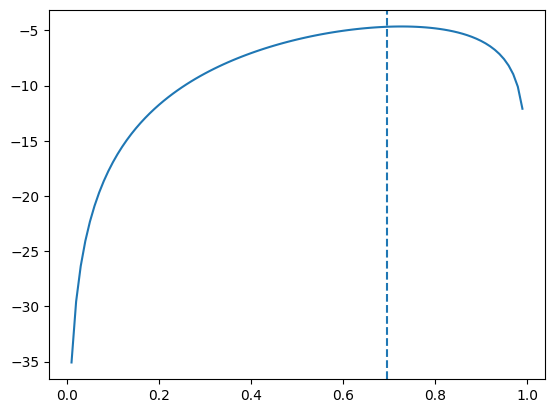

In [39]:
plt.plot(rho, [log_posterior(r, X) for r in rho])
plt.axvline(best_result['x'], linestyle='--')

## Posterior means

$$\mathbb{E}\rho = \frac{\sum_iX_i+a}{(N + a + b)}$$

In [40]:
t_space = np.linspace(0, 1)

def posterior_mean(a, b, X):
    return (np.sum(X) + a) / (len(X) + a + b)

def posterior_second_moment(a, b, X):
    return sps.beta(np.sum(X) + a, len(X) - sum(X) + b).var() + posterior_mean(X) ** 2

In [42]:
# plt.plot(t_space, posterior_second_moment(1, 1, X))

TypeError: posterior_mean() missing 2 required positional arguments: 'b' and 'X'